# Hands On Python 3 - Datenaufbereitung
Dieses Notebook zeigt wie
- man Daten aus zwei csv Dateien zu einem Datensatz zusammenfügen kann
- wie man mit nicht existenten Werten (NaN - Not a Number) umgeht
- wie man Zeitreihen mit unterschiedlichen Frequenzen auf eine gemeinsame Frequenz bringen kann

## Notwendige Bibliotheken importieren

In [ ]:
# notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

## Daten einlesen

In [8]:
# Daten einlesen

# Daten der 1. Quelle
#rawData1 = pd.read_csv('/content/drive/My Drive/source1.csv')
rawData1 = pd.read_csv("source1.csv")
# Lesen Sie die Daten der 2. Quelle ein
#rawData2 = pd.read_csv('/content/drive/My Drive/source2.csv')
rawData2 = pd.read_csv("source2.csv")

In [9]:
# Anzahl der Zeilen und Spalten ausgeben
rawData1.shape

(135, 5)

In [10]:
rawData2.shape

(45, 2)

In [ ]:
# Geben Sie Zeilen und Spalten des 1. Datensatzes von Quelle 1 aus
rawData1.iloc[0]

In [ ]:
# Geben Sie Zeilen und Spalten des 2. Datensatzes von Quelle 2 aus
rawData2.iloc[1]

In [ ]:
# Geben Sie die ersten Zeilen von Quelle 1 aus:
rawData1.head(1)

In [ ]:
# Geben Sie die ersten Zeilen von Quelle 2 aus:
rawData2.head(1)

In [ ]:
# Geben Sie die letzten Zeilen von Quelle 1 aus:
rawData1.tail(1)

In [ ]:
# Geben Sie die letzten Zeilen von Quelle 2 aus
rawData2.tail(1)

## Daten auf fehlende Werte hin überprüfen

In [ ]:
# Geben Sie sich die Anzahl der NaNs in den Spalten von Quelle 2 aus:
rawData2.isna().sum()

In [ ]:
# Sofern der Datensatz keine NaNs erhält --> Kopie der Rohdaten namens data2 erstellen und damit direkt weiterarbeiten:
data2 = rawData2.copy()

In [ ]:
# Wie sieht es bei rawData1 aus? Geben Sie für rawData1 die Anzahl der NaNs in den Spalten aus
rawData1.isna().sum()

## Mit NaNs umgehen

### Möglichkeit 1: alle Zeilen, in denen mindestens 1x NaN vorkommt, löschen

In [29]:
# Kopie der Rohdaten anlegen
data1_del = rawData1.copy() 

# Zeilen mit mind. 1x NaN löschen (d.h. in irgendeiner Spalte kommt ein NaN vor --> Zeile wird gelöscht)
data1_del.dropna(inplace=True)

# Überprüfen
data1_del.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

### Möglichkeit 2: Fehlende Werte durch interpolierte Werte ersetzen

### Linear Interpolieren

In [30]:
# Führen Sie eine lineare Interpolation durch. Erstellen Sie sich dazu zunächst data1_ip als Kopie von rawData1
data1_ip = rawData1.copy()
data1_ip.interpolate(inplace=True)

In [31]:
# Geben Sie sich die Anzahl an NaN in den Spalten nach der Interpolation aus:
data1_ip.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

<AxesSubplot: >

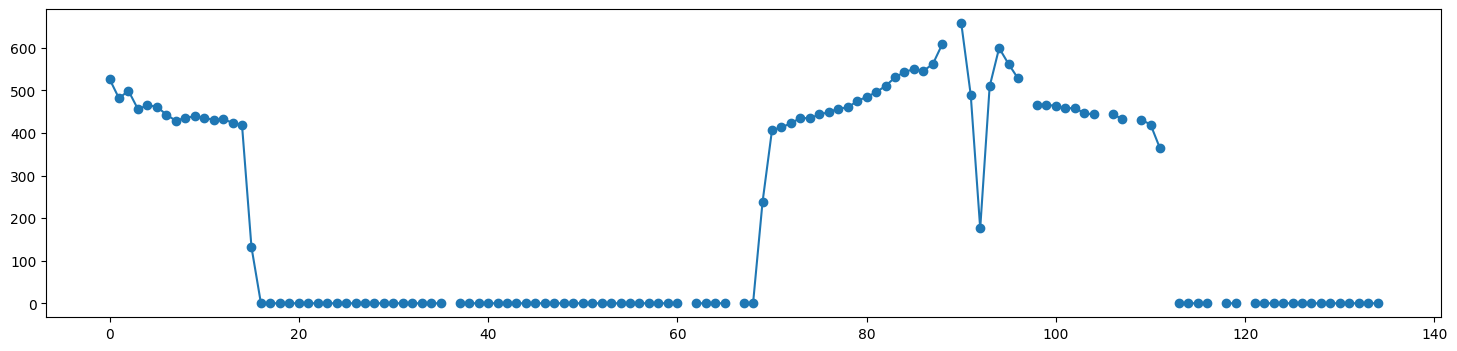

In [32]:
# Plotten der alten Zeitreihe
plt.figure(figsize=(18, 4))
rawData1['Light'].plot(marker='o')   

<AxesSubplot: >

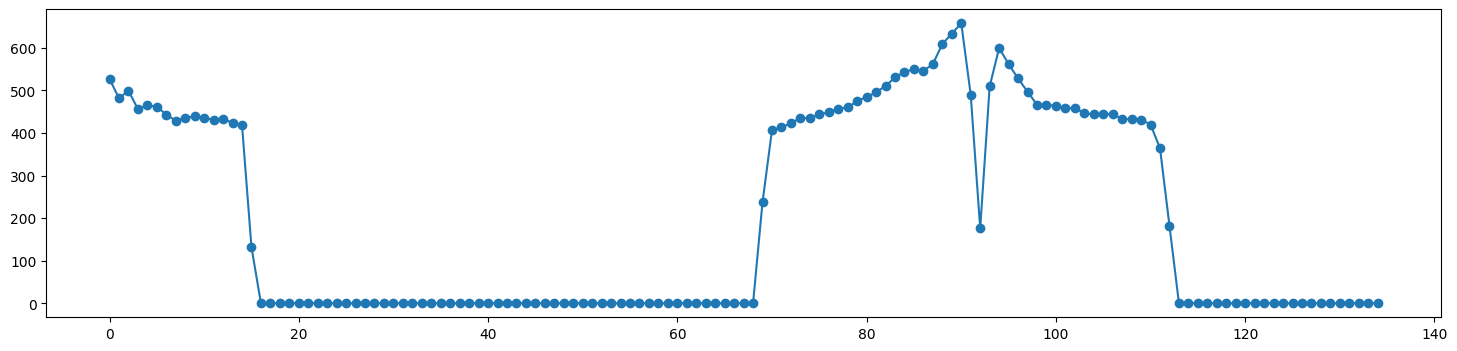

In [33]:
#neue Zeitreihe mit interpolierten Werten plotten
plt.figure(figsize=(18, 4))
data1_ip['Light'].plot(marker='o')

Wie zufrieden sind Sie mit der Interpolation?


....

In [17]:
# Grundsätzlich ist auch möglich mit Polynomfunktionen zu interpolieren.
# Interpolieren Sie quadratisch (method='polynomial', order=2)
data1_pp = rawData1.copy()
data1_pp.interpolate(method='polynomial', order=2, inplace=True)

In [18]:
# Anzahl an NaN in Spalten ausgeben
data1_pp.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

<AxesSubplot: >

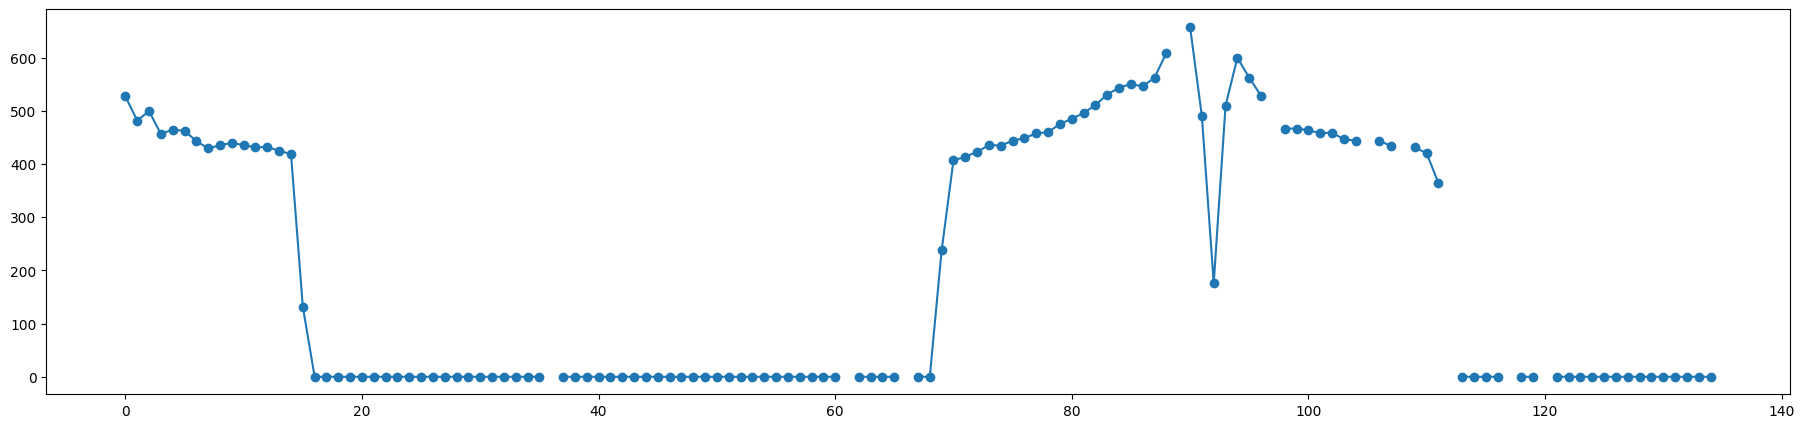

In [13]:
# Plotten Sie zum Vergleich wieder die alte und die neue Zeitreihe 
# Plot der alten Zeitreihe:
plt.figure(figsize=(22.5, 5))
rawData1['Light'].plot(marker='o')


<AxesSubplot: >

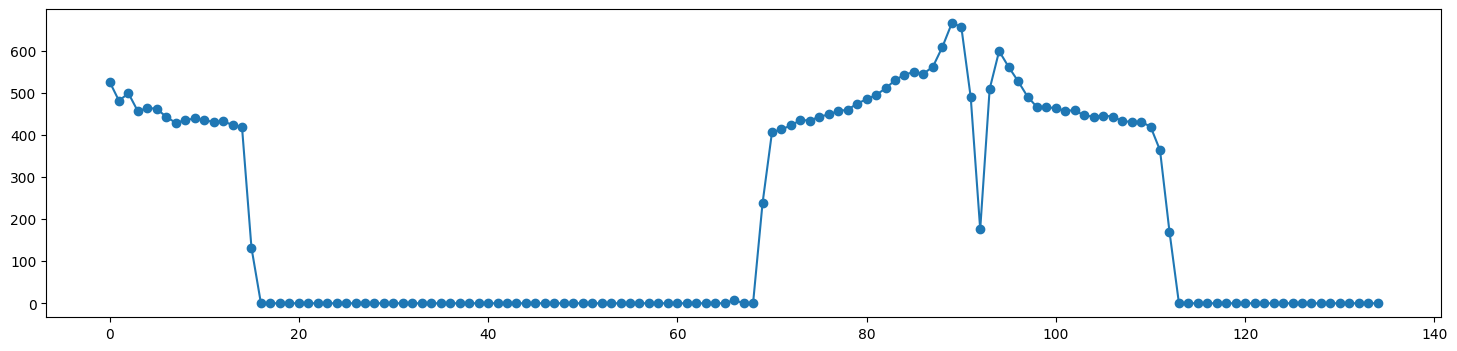

In [16]:
# Plot der neuen Zeitreihe:
plt.figure(figsize=(18, 4))
data1_pp['Light'].plot(marker='o')

Hat sich die quadratische Interpolation im Vergleich zur linearen gelohnt? Welches der beiden Interpolationsverfahren würden Sie wählen?

.......

## Zeitstempel als Index setzen
- Momentan sind die Zeilenindizes einfach durchnummeriert: 0,1,2,...
- Wenn der Zeitstempel als Index gesetzt wird, kann man einfacher arbeiten
- Dafür muss der Zeitstempel als erstes in das Format datetime gebracht werden, damit Python ihn als Zeitstempel erkennt

In [41]:
# die Spalte Date ist noch nicht im datetime Format
data1_ip.dtypes

Date          object
Energy       float64
Light        float64
CO2          float64
Occupancy    float64
dtype: object

In [42]:
# Bringen Sie die Spalte Date ins datetime Format 
data1_ip["Date"] = pd.to_datetime(data1_ip["Date"])

In [45]:
# Indizieren Sie mit der Zeitstempel-Spalte 
data1_ip.set_index("Date", inplace=True)


In [46]:
# Kontrollieren Sie das durch Ausgabe der ersten Zeilen des Datensatzes.
data1_ip.head(1)

,Energy,Light,CO2,Occupancy
Date,,,,
2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0


Wieso wird bei wiederholtem Ausführen obiger Zelle ein Fehler geworfen? Müssen Sie etwas am Code korrigieren?

....

In [49]:
# Indizieren Sie auch data2 mit dessen Zeitstempel
data2['Date'] = pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)

KeyError: 'Date'

In [51]:
data2.dtypes

Temperature    float64
dtype: object

In [52]:
data2.head()

,Temperature
Date,
2015-02-02 14:00:00,23.657118
2015-02-02 15:00:00,23.293950
2015-02-02 16:00:00,22.773142
2015-02-02 17:00:00,22.534520
2015-02-02 18:00:00,21.993372


In [53]:
data1_ip.head()

,Energy,Light,CO2,Occupancy
Date,,,,
2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


## Datensätze zu einem Zusammenfügen
- Problem: Die Datensätze haben unterschiedliche Frequenzen: Datensatz 1: 15min, Datensatz 2: stündlich
- Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind, also jede volle Stunde
- Möglichkeit 2: Den Datensatz mit der höheren Frequenz (Datensatz 1) runtersamplen, z.B. indem der stündliche Mittelwert oder die Summe über je eine Stunde gebildet wird

Frage: Worauf muss man aufpassen, wenn man Möglichkeit 2 wählt?

Antwort: 
....

### Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind

In [ ]:
# Neuen Datensatz definieren, der aus Datensatz 2 von rechts angehängt an Datensatz 1 besteht
data = pd.concat([data1_ip, data2], axis=1)

# Dort wo keine Werte für den jeweiligen Zeitstempel vorhanden sind, werden NaN eingefügt
data.head()

In [ ]:
# Löschen Sie nun noch die Zeilen in denen mindestens 1x NaN vorkommt:


# Ausgabe der ersten Zeilen von data zur Kontrolle:


## Möglichkeit 2: 
- Datensatz 1 soll von 15minüten auf stündliche Werte runtergesampelt werden
- Für die Spalten Light und CO2 soll dazu der stündliche Mittelwert genommen werden
- Für die Spalte Energy soll dazu jeweils die Summe über die 4 Werte in einer Stunde gebildet werden
- Für die Spalte Occupancy soll einfach der Wert zur vollen Stunde genommen werden

In [ ]:
# Ursprünglicher Datensatz
data1_ip.head()

In [ ]:
# Ursprünglichen Datensatz aufteilen

# nur die Spalten, die gemittelt werden sollen 
data1_mean = data1_ip.copy()
data1_mean.drop(['Energy', 'Occupancy'], axis=1, inplace=True)
data1_mean.head()

In [ ]:
# Generieren Sie einen Datensatz data1_sum, der nur die Spalten enthält, die summiert werden sollen


In [ ]:
# Generieren Sie einen Datensatz data1_binary, der nur die Spalten enthält, die weder gemittelt noch aufsummiert werden sollen


In [ ]:
# Bringen Sie den Datensatz data1_mean durch Mittelwertbildung auf eine höhere Frequenz (stündlich):


# Lassen Sie sich zur Kontrolle die ersten Zeilen ausgeben:


In [ ]:
# Bringen Sie data1_sum durch Summenbildung auf eine höhere Frequenz (stündlich). (statt .mean() verwenden Sie .sum())

# Ausgabe der ersten Zeilen zur Kontrolle:


In [ ]:
# Bringen Sie den Datensatz data1_binary auf eine höhere Frequenz (stündlich). 
# Dafür soll immer der Wert des Merkmals Occupancy zu vollen Stunde genommen werden, die anderen Werte sollen verworfen werden. 


# Ausgabe der ersten Zeilen zur Kontrolle:


In [ ]:
# Daten zusammenfügen
data = pd.concat([data2, data1_resampled_sum, data1_resampled_mean, data1_resampled_binary], axis=1)

data.head()

In [ ]:
# Entfernen von Zeilen mit mind. 1x NaN falls vorhanden:
data.dropna(inplace=True)

In [ ]:
# Ausgabe der ersten Zeilen von data
data.head()

In [ ]:
# Ausgabe der Anzahl NaN in den jeweiligen Spalten

data.isna().sum()